# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier

LinkedIn: https://www.linkedin.com/in/ashish-jangra/

Assignment:

- Load the pretrainde Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os


2025-09-21 09:42:59.316091: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-21 09:42:59.656310: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-21 09:43:01.129042: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# ========== Load Models ==========
GENERATOR_PATH = "generator_700.h5"
GENDER_VECTOR_PATH = "gender_classifier.keras"

print("Loading generator...")
generator = load_model(GENERATOR_PATH, compile=False)

print("Loading gender classifier...")
gender_classifier = load_model(GENDER_VECTOR_PATH, compile=False)



Loading generator...


I0000 00:00:1758447846.911499    2987 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Loading gender classifier...


In [3]:
# ========== Helper Functions ==========

def generate_latent_points(latent_dim, n_samples):
    """Generate random latent points (noise)"""
    return np.random.randn(latent_dim * n_samples).reshape(n_samples, latent_dim)

def generate_images(generator, latent_dim=100, n_samples=1):
    """Generate images from the generator"""
    latent_points = generate_latent_points(latent_dim, n_samples)
    images = generator.predict(latent_points)
    images = (images + 1) / 2.0  # scale from [-1,1] to [0,1]
    return images, latent_points



In [8]:
def interpolate_gender(generator, classifier, latent_point=None, steps=10, latent_dim=100):
    """
    Interpolates gender by searching direction in latent space
    using classifier predictions instead of classifier weights.
    Works for sigmoid (1 output) or softmax (2 outputs).
    """
    latent_male = None
    latent_female = None

    # Keep searching until we find strong male & female examples
    while latent_male is None or latent_female is None:
        candidate = generate_latent_points(latent_dim, 1)
        img = generator.predict(candidate)
        img_norm = (img + 1) / 2.0

        pred = classifier.predict(img_norm)[0]

        # Handle sigmoid (1 output) or softmax (2 outputs)
        if pred.shape == ():   # scalar
            pred_val = pred
        elif len(pred.shape) == 0:  # also scalar
            pred_val = float(pred)
        elif len(pred) == 1:   # sigmoid
            pred_val = pred[0]
        else:                  # softmax [male, female]
            pred_val = pred[1]  # prob of female

        if pred_val < 0.3 and latent_male is None:
            latent_male = candidate[0]
        elif pred_val > 0.7 and latent_female is None:
            latent_female = candidate[0]

    # Interpolate male → female
    interpolations = []
    for alpha in np.linspace(0, 1, steps):
        new_latent = (1 - alpha) * latent_male + alpha * latent_female
        img = generator.predict(np.expand_dims(new_latent, 0))
        img = (img + 1) / 2.0
        interpolations.append(img[0])
    return interpolations


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


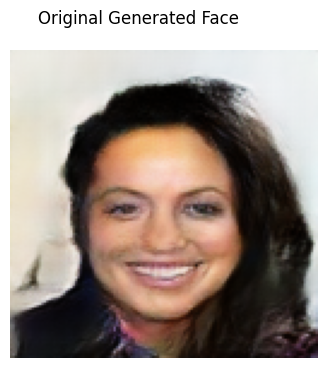

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


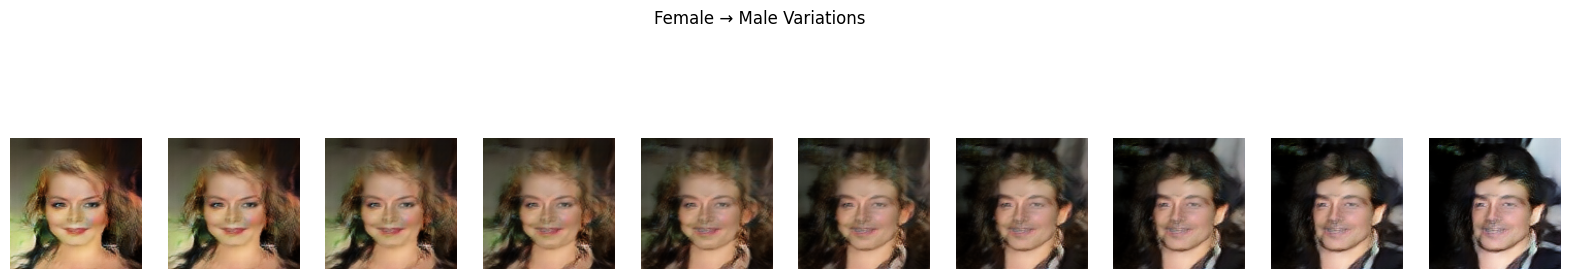

In [27]:
# ========== Main Execution ==========
if __name__ == "__main__":
    latent_dim = 100

    # Generate one random face
    images, latent_points = generate_images(generator, latent_dim, 1)
    show_images(images, "Original Generated Face")

    # Interpolate across gender
    variations = interpolate_gender(generator, gender_classifier, latent_points[0], steps=10)
    show_images(variations, "Female → Male Variations")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


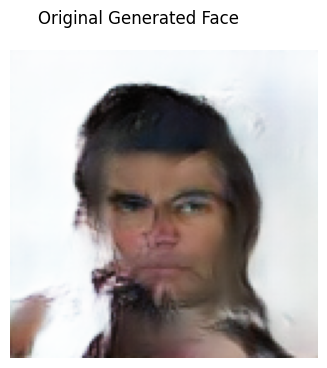

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


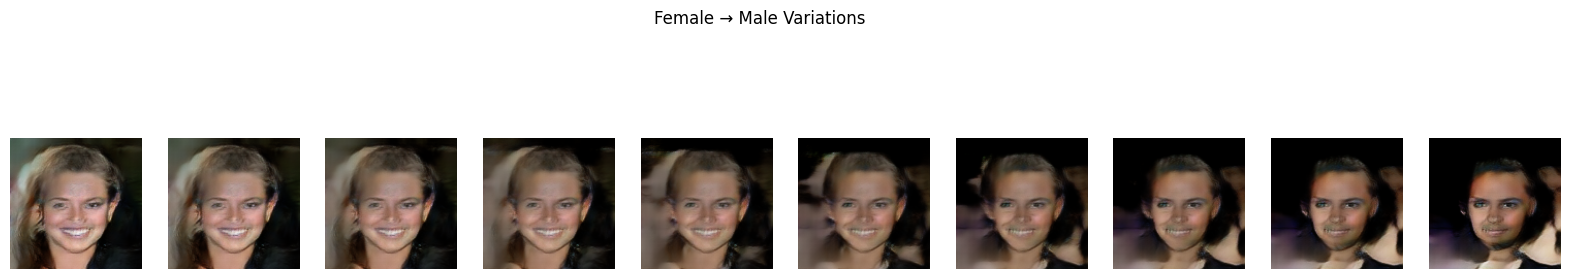

In [30]:
if __name__ == "__main__":
    latent_dim = 100

    # Generate one random face
    images, latent_points = generate_images(generator, latent_dim, 1)
    show_images(images, "Original Generated Face")

    # Interpolate across gender
    variations = interpolate_gender(generator, gender_classifier, latent_points[0], steps=10)
    show_images(variations, "Female → Male Variations")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


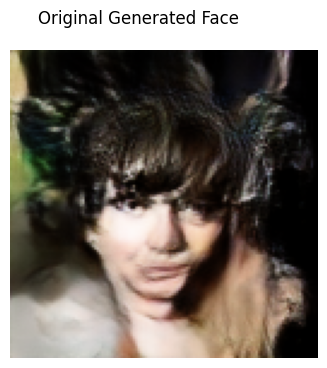

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

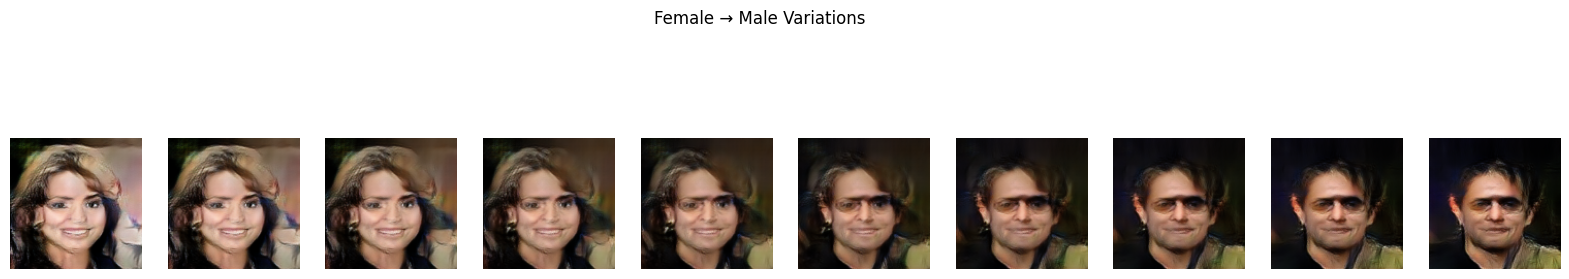

In [53]:
if __name__ == "__main__":
    latent_dim = 100

    # Generate one random face
    images, latent_points = generate_images(generator, latent_dim, 1)
    show_images(images, "Original Generated Face")
    # Interpolate across gender
    variations = interpolate_gender(generator, gender_classifier, latent_points[0], steps=10)
    show_images(variations, "Female → Male Variations")

#### I treid to many time but the  output is not come good this three not so good but okay to show the variations 